In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
cities = pandas.read_csv('US_cities.csv')
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(cities.Longitude, cities.Latitude)]
cities = cities.drop(['Longitude', 'Latitude'], axis = 1)
crs = {'init':'epsg:4326'}
cities = GeoDataFrame(cities, crs=crs, geometry=geometry)
# cities = cities.to_crs({'init': 'epsg:3395'})
cities.head()

,id,Country,City,AccentCity,Region,Population,geometry
0,2907755,us,alabaster,Alabaster,AL,26738.0,POINT (-86.81638890000001 33.2441667)
1,2907759,us,albertville,Albertville,AL,18368.0,POINT (-86.20888890000001 34.2675)
2,2907765,us,alexander city,Alexander City,AL,14993.0,POINT (-85.95388890000002 32.9438889)
3,2907804,us,anniston,Anniston,AL,23423.0,POINT (-85.8316667 33.6597222)
4,2907848,us,athens,Athens,AL,20470.0,POINT (-86.9716667 34.8027778)


In [3]:
cafes = geopandas.read_file('cafes_us_OSM.geojson')
cafes.head()

,id,@id,amenity,building,cuisine,name,operator,wheelchair,website,addr:city,...,karaoke,gambling,reservation,tourism:disused,indoor:level,landuse,diet:raw,name:it,amenity:ice_cream,geometry
0,node/31327678,node/31327678,cafe,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-122.330085 47.5454108)
1,node/32153673,node/32153673,cafe,None,coffee_shop,Siuslaw Coffee Roasters,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-124.1081239 43.9662488)
2,node/33979948,node/33979948,cafe,None,None,Country Style,MTY Group,yes,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-76.4835513 44.2569218)
3,node/34084322,node/34084322,cafe,None,coffee_shop,Tim Hortons,Restaurant Brands International Inc.,None,http://www.timhortons.com/,None,...,None,None,None,None,None,None,None,None,None,POINT (-76.5066058 44.2598381)
4,node/35332415,node/35332415,cafe,None,coffee_shop,Starbucks,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-76.9346255 40.2387067)


In [4]:
cafes.sample().T.dropna()

,6889
id,node/2157948579
@id,node/2157948579
amenity,cafe
cuisine,bubble_tea
name,Verde Tea Cafe
addr:city,Mountain View
addr:housenumber,852
addr:street,Villa Street
geometry,POINT (-122.0794931 37.3941483)


In [5]:
cafes['count'] = 1
cafes[['cuisine', 'count']].groupby('cuisine').sum().sort_values('count', ascending=False)[:10]

,count
cuisine,
coffee_shop,6166
donut,625
ice_cream,290
sandwich,284
american,220
coffee,78
cafe,73
regional,71
bagel,64


In [6]:
sorted(list(cafes.columns))[:20]

['@id',
 'Door',
 'FIXME',
 'Notes',
 'access',
 'addr',
 'addr.source:street',
 'addr:city',
 'addr:country',
 'addr:county',
 'addr:direction',
 'addr:door',
 'addr:flats',
 'addr:floor',
 'addr:full',
 'addr:house',
 'addr:housename',
 'addr:housenumber',
 'addr:interpolation',
 'addr:place']

In [7]:
cafes.isnull().sum() / len(cafes)

id                          0.000000
@id                         0.000000
amenity                     0.000000
building                    0.998607
cuisine                     0.552107
name                        0.030798
operator                    0.970932
wheelchair                  0.950800
website                     0.814443
addr:city                   0.763946
addr:country                0.961514
addr:housenumber            0.665257
addr:province               0.971412
addr:street                 0.657954
internet_access             0.852784
opening_hours               0.866766
payment:amex                0.985154
payment:coins               0.984817
payment:notes               0.984817
recycling:coffee_cups       0.999856
created_by                  0.995628
addr:postcode               0.764186
description                 0.992024
hst_number                  0.999760
self_checkout               0.999952
capacity                    0.998847
smoking                     0.948734
w

In [8]:
cafes = cafes.T[cafes.isnull().sum() / len(cafes) < 0.6].T
cafes.sample(5)

,id,@id,amenity,cuisine,name,geometry,count
12245,node/3367217305,node/3367217305,cafe,None,Tropical Smoothie Cafe,POINT (-113.5616411 37.1121392),1
9133,node/2605729050,node/2605729050,cafe,coffee_shop,Dunkin Donuts (Summer Only),POINT (-70.3747085 43.515823),1
15173,node/4045366894,node/4045366894,cafe,donut,Dunkin' Donuts,POINT (-70.5956206 41.566752),1
17698,node/4514634690,node/4514634690,cafe,coffee_shop,Starbucks,POINT (-78.6799591 35.8571021),1
7638,node/2332676900,node/2332676900,cafe,None,Starbucks,POINT (-111.8926801 40.588471),1


In [9]:
del cafes['id']
del cafes['@id']
cafes.head()

,amenity,cuisine,name,geometry,count
0,cafe,None,None,POINT (-122.330085 47.5454108),1
1,cafe,coffee_shop,Siuslaw Coffee Roasters,POINT (-124.1081239 43.9662488),1
2,cafe,None,Country Style,POINT (-76.4835513 44.2569218),1
3,cafe,coffee_shop,Tim Hortons,POINT (-76.5066058 44.2598381),1
4,cafe,coffee_shop,Starbucks,POINT (-76.9346255 40.2387067),1


In [19]:
us_geo = geopandas.read_file('us_20m.json')
us_geo.crs = {'init' :'epsg:4326'}

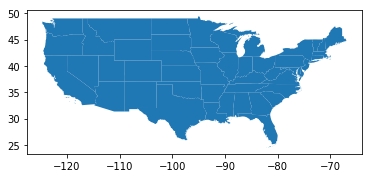

In [20]:
us_geo = us_geo[(us_geo.NAME != "Hawaii") & (us_geo.NAME != "Alaska") & (us_geo.NAME != "Puerto Rico")]
us_geo.plot()
plt.show()

In [21]:
cafes = geopandas.GeoDataFrame(cafes)
cafes.crs = {'init' :'epsg:4326'}
cafes = cafes.to_crs({'init': 'epsg:3395'})
us_geo = us_geo.to_crs({'init': 'epsg:3395'})

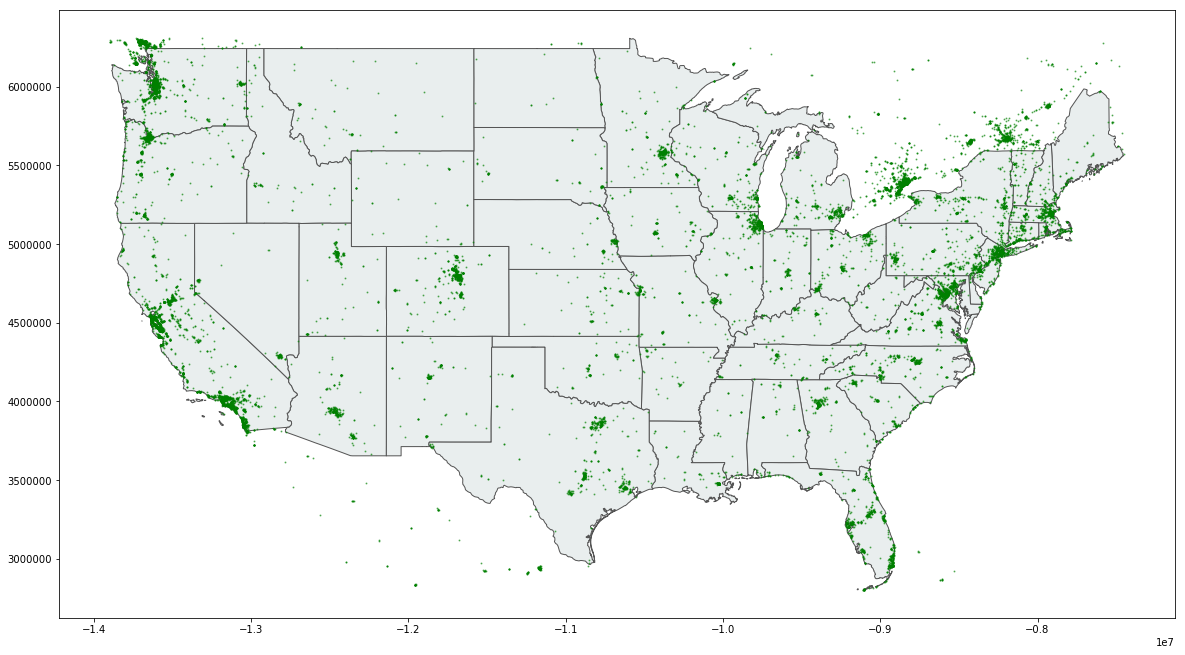

In [22]:
base = us_geo.plot(color='#e9eeee', edgecolor='#555555', figsize=(20,20))
cafes.plot(ax=base, marker='o', color='green', markersize=1, alpha=0.5)
plt.show()

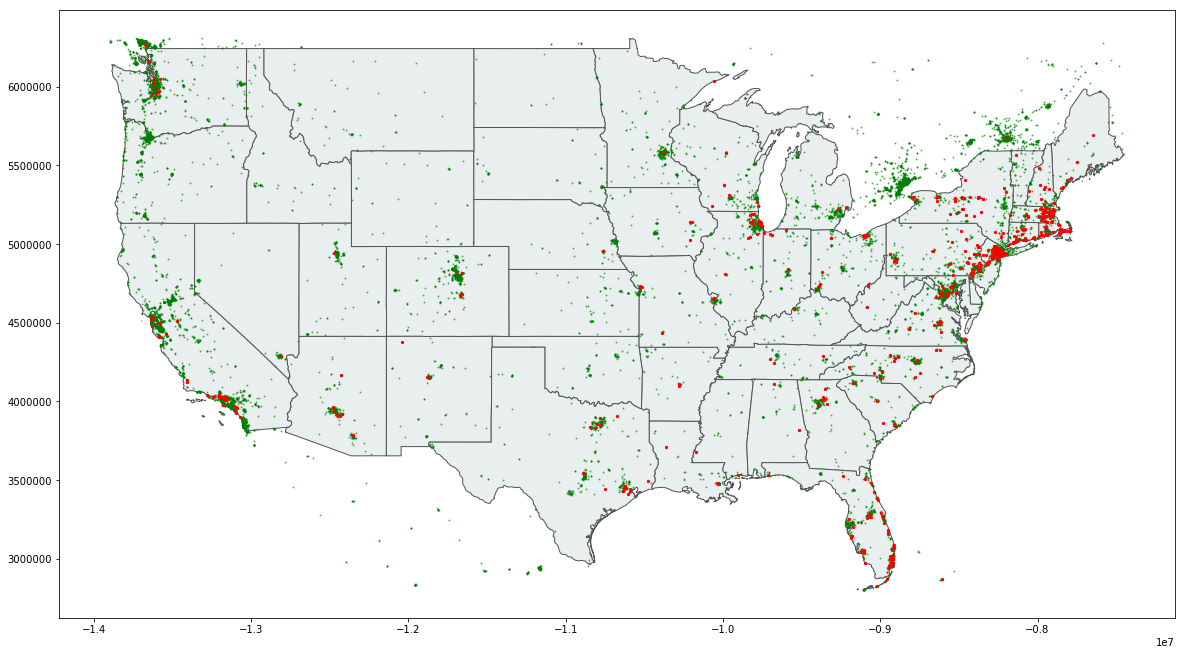

In [23]:
base = us_geo.plot(color='#e9eeee', edgecolor='#555555', figsize=(20,20))
cafes[cafes['cuisine']!='donut'].plot(ax=base, marker='o', color='green', markersize=1, alpha=0.5)
cafes[cafes['cuisine']=='donut'].plot(ax=base, marker='o', color='red', markersize=5, alpha=1)
plt.show()

### Finding the cafe's nearest city or town

In [24]:
cafes = cafes.to_crs({'init': 'epsg:4326'})
us_geo = us_geo.to_crs({'init': 'epsg:4326'})

In [25]:
from shapely.ops import nearest_points
multipoint =  cities.geometry.unary_union
def near(point, pts=multipoint):
    nearest = cities.geometry == nearest_points(point, pts)[1]
    return cities[nearest].City.get_values()[0]

In [26]:
cafes_sample = cafes.sample(50)
cafes_sample['nearest'] = cafes_sample.apply(lambda cafe: near(cafe.geometry), axis=1)
cafes_sample[['name', 'nearest', 'geometry']]

,name,nearest,geometry
19188,Dooney's Cafe,niagara falls,POINT (-79.42479849999999 43.6623165999999)
15660,Firelands Café,sandusky,POINT (-82.59462509999999 41.39778199999985)
5068,Starbucks,fort collins,POINT (-105.0921089 40.55302779999984)
9178,Mitchell's Coffee House,lakeland,POINT (-81.9550215 28.04630939999938)
7915,Bagel and More,new york,POINT (-74.00000740000002 40.73848729999983)
4036,Starbucks Coffee,oakland,POINT (-122.273898 37.80044439999977)
12121,Starbucks,mount vernon,POINT (-73.8283531 40.95044309999985)
14026,The Wydown,washington,POINT (-77.03219110000001 38.91645309999979)
7614,Belle Epicurean,seattle,POINT (-122.2920724 47.62608069998335)
17372,Cafe Ross,san anselmo,POINT (-122.5555492 37.96018919999976)


### Problems

How would you compute the distance from a given cafe to the nearest Starbucks? 

### References

Geopandas mapping: http://geopandas.org/mapping.html